# Exploration of the database

This notebook is used to explore the contents of each of the different files originating from the kaggle [Formula 1 World Championship (1950-2023)](https://www.kaggle.com/datasets/rohanrao/formula-1-world-championship-1950-2020).

## Importing of the databases

In [1]:
import os

for dir, _, filenames in os.walk('./data'):
    for filename in filenames:
        print(os.path.join(dir, filename))

./data/circuits.csv
./data/status.csv
./data/lap_times.csv
./data/sprint_results.csv
./data/drivers.csv
./data/races.csv
./data/constructors.csv
./data/constructor_standings.csv
./data/qualifying.csv
./data/driver_standings.csv
./data/constructor_results.csv
./data/pit_stops.csv
./data/seasons.csv
./data/results.csv


## Exploring the databases

Below we explore each of the different datasets and describe what each of the datasets contain. 

### Circuits

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
circuits = pd.read_csv(os.path.join(dir, filenames[0]), index_col='circuitId')

circuits

,circuitRef,name,location,country,lat,lng,alt,url
circuitId,,,,,,,,
1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,18,http://en.wikipedia.org/wiki/Sepang_Internatio...
3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,7,http://en.wikipedia.org/wiki/Bahrain_Internati...
4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57000,2.26111,109,http://en.wikipedia.org/wiki/Circuit_de_Barcel...
5,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,130,http://en.wikipedia.org/wiki/Istanbul_Park
...,...,...,...,...,...,...,...,...
75,portimao,Autódromo Internacional do Algarve,Portimão,Portugal,37.22700,-8.62670,108,http://en.wikipedia.org/wiki/Algarve_Internati...
76,mugello,Autodromo Internazionale del Mugello,Mugello,Italy,43.99750,11.37190,255,http://en.wikipedia.org/wiki/Mugello_Circuit
77,jeddah,Jeddah Corniche Circuit,Jeddah,Saudi Arabia,21.63190,39.10440,15,http://en.wikipedia.org/wiki/Jeddah_Street_Cir...


In [6]:
circuits.info()

<class 'pandas.core.frame.DataFrame'>
Index: 77 entries, 1 to 79
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   circuitRef  77 non-null     object 
 1   name        77 non-null     object 
 2   location    77 non-null     object 
 3   country     77 non-null     object 
 4   lat         77 non-null     float64
 5   lng         77 non-null     float64
 6   alt         77 non-null     object 
 7   url         77 non-null     object 
dtypes: float64(2), object(6)
memory usage: 5.4+ KB


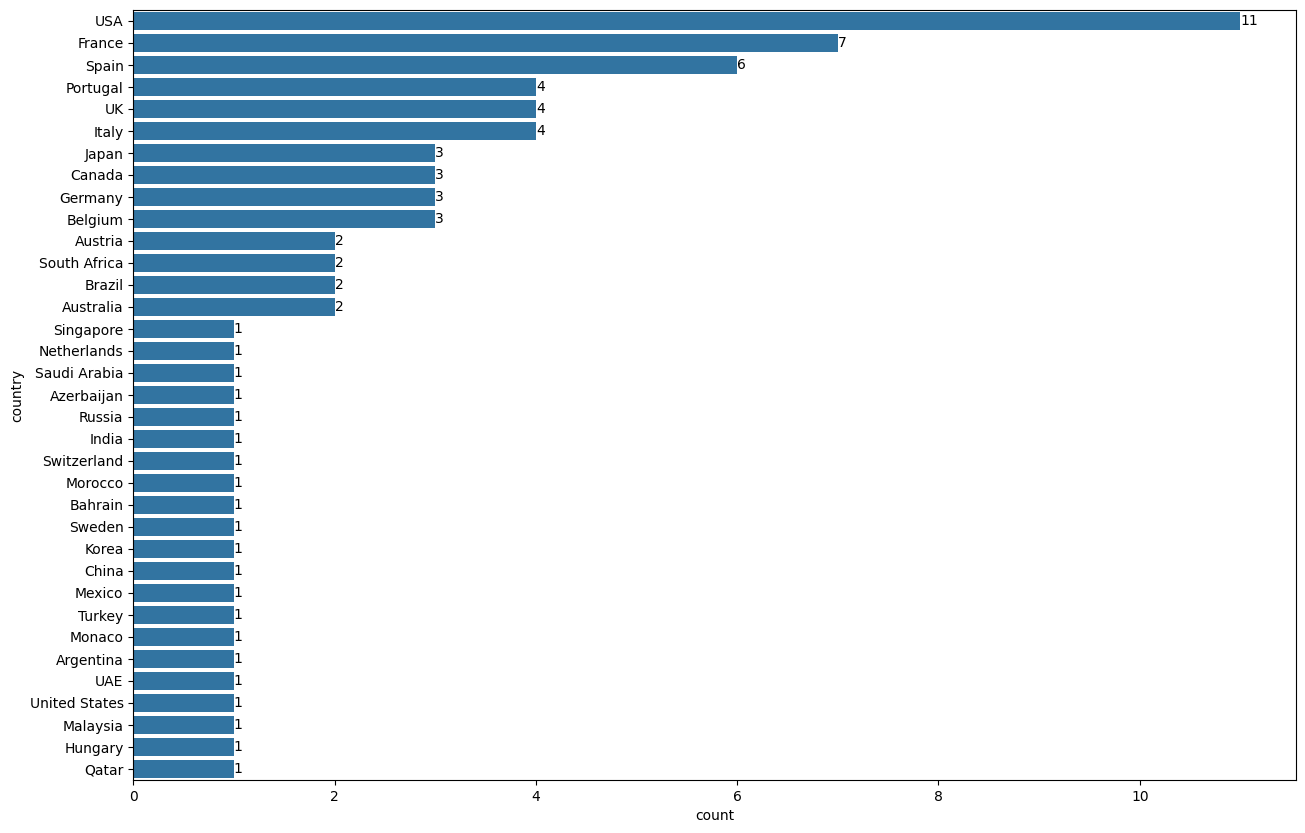

In [28]:
plt.figure(figsize=(15,10))

count_country = circuits.country.value_counts()

bar = sns.barplot(count_country, orient='y')
bar = bar.bar_label(bar.containers[0], fontsize=10)


The circuits database shows for all the tracks over the last 60 years what the names are, where it is located and what the altitude is and gives the wikipedia link as reference.

### Display the data on a map

<Axes: xlabel='circuitId'>

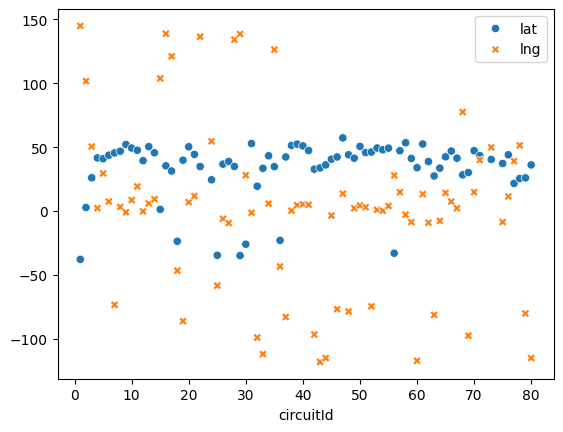

In [33]:
sns.scatterplot(data=circuits[['lat', 'lng']])

In [35]:
import geopandas as gpd
from shapely.geometry import Point

circuits['coordinates'] = circuits.apply(lambda row: Point(row.lng, row.lat), axis=1)

geo_circuits = gpd.GeoDataFrame(circuits, geometry='coordinates')

<Axes: >

<Figure size 3000x600 with 0 Axes>

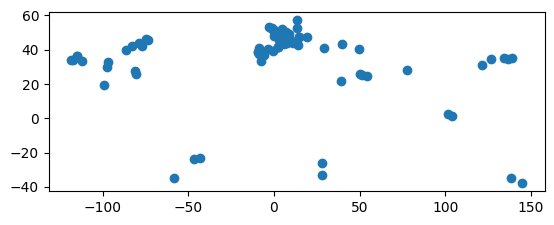

In [40]:
plt.figure(figsize=(30,6))

geo_circuits.plot()

In [45]:
import folium

map = folium.Map(location=[geo_circuits.lat.mean(), geo_circuits.lng.mean()], zoom_start=2)

for _, row in geo_circuits.iterrows():
    folium.Marker(location=[row.lat, row.lng], popup=row.name).add_to(map)

map